In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df=df.iloc[:,1:]

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
mean=df['depth'].mean()
df['depth']=df['depth'].fillna(mean)

In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
df.shape

(26967, 10)

In [11]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




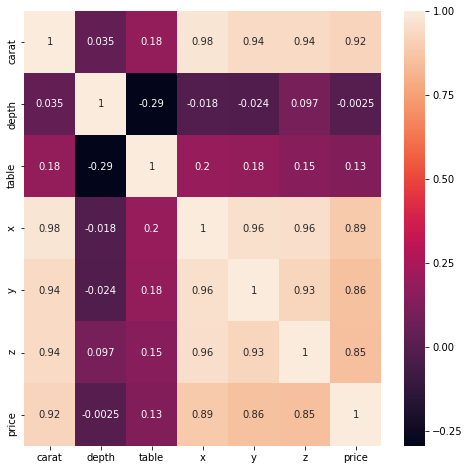

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:, [0,4,5,6,7,8,9]].corr(),annot=True)

In [13]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


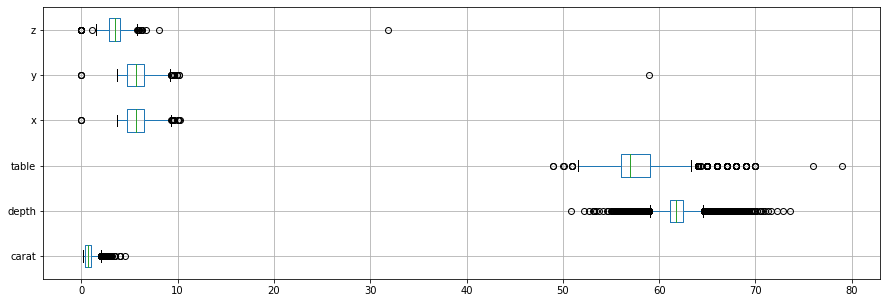

In [14]:
plt.figure(figsize=(15,5))
df.iloc[:, [0,4,5,6,7,8]].boxplot(vert=0)

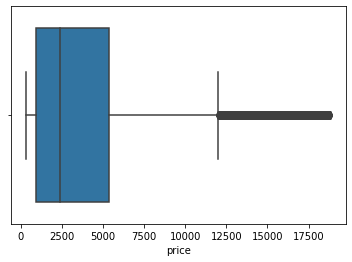

In [15]:
sns.boxplot(df['price'])

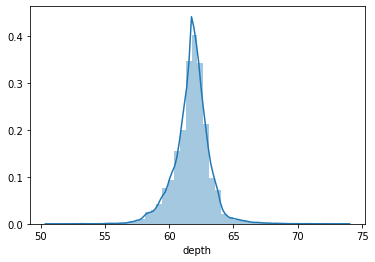

In [16]:
sns.distplot(df['depth']) 

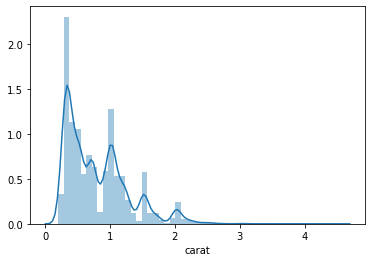

In [17]:
sns.distplot(df['carat']) 

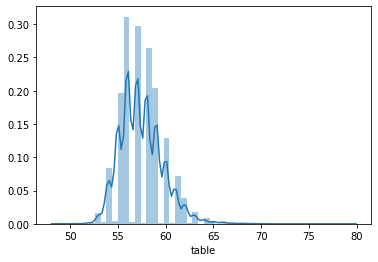

In [18]:
sns.distplot(df['table'])

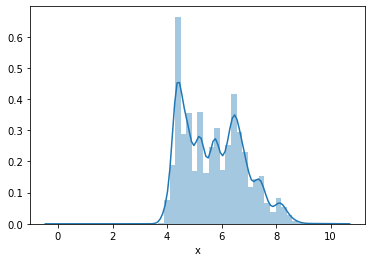

In [19]:
sns.distplot(df['x'])

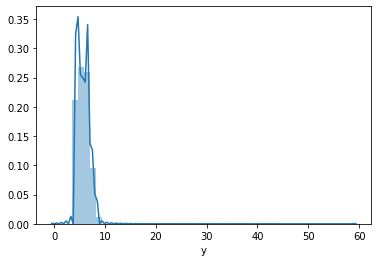

In [20]:
sns.distplot(df['y'])

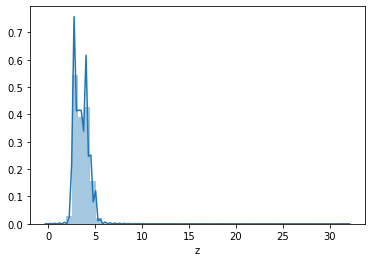

In [21]:
sns.distplot(df['z'])

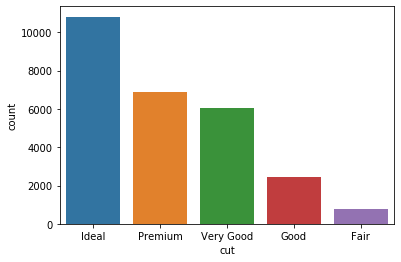

In [22]:
sns.countplot(df['cut'])

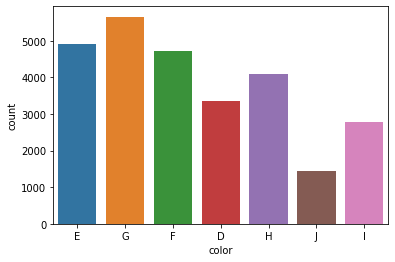

In [23]:
sns.countplot(df['color'])

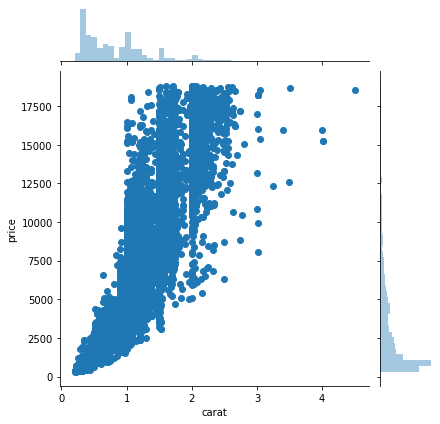

In [24]:
sns.jointplot(df['carat'],df['price'])

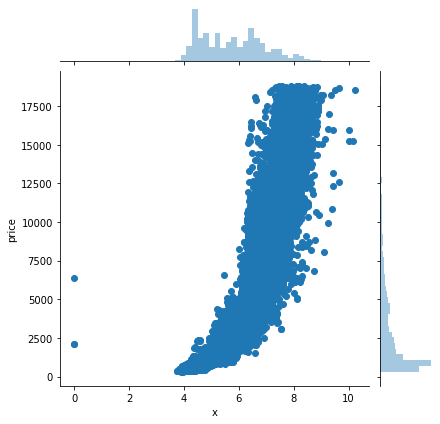

In [25]:
sns.jointplot(df['x'],df['price'])

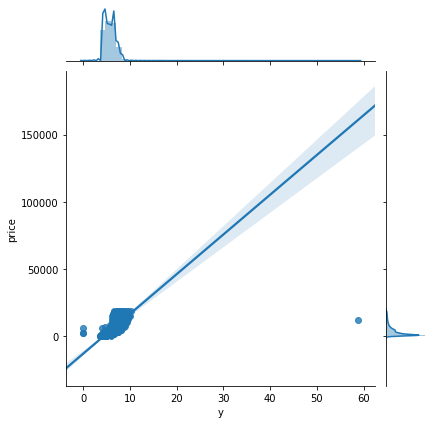

In [26]:
sns.jointplot(df['y'],df['price'],kind='reg')

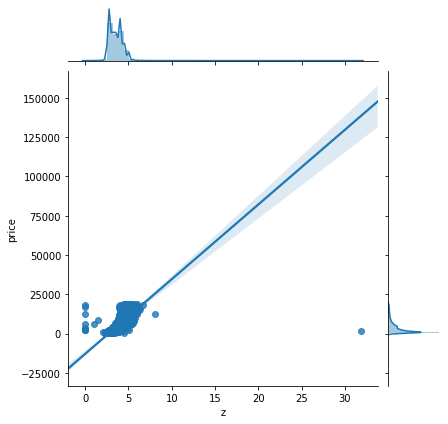

In [27]:
sns.jointplot(df['z'],df['price'],kind='reg')

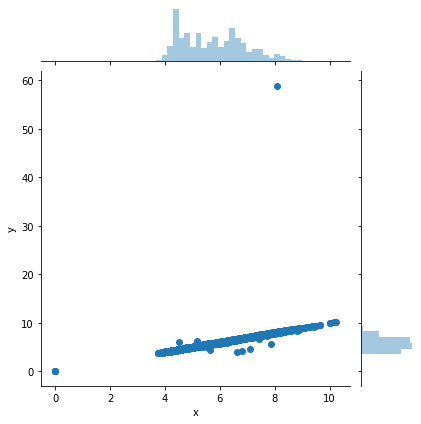

In [28]:
sns.jointplot(df['x'],df['y'])

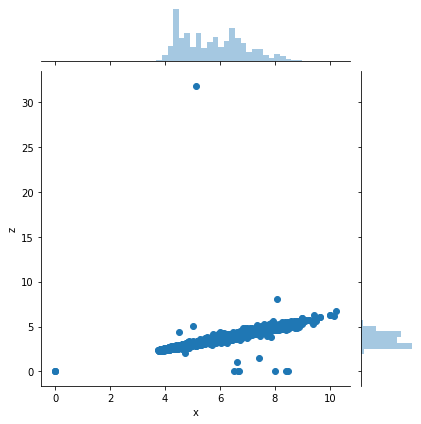

In [29]:
sns.jointplot(df['x'],df['z'])

In [30]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: cut
[Ideal, Premium, Very Good, Good, Fair]
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[2 3 4 1 0]


feature: color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


feature: clarity
[SI1, IF, VVS2, VS1, VVS1, VS2, SI2, I1]
Categories (8, object): [I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]
[2 1 7 4 6 5 3 0]


In [31]:
from scipy.stats import zscore
for i in df.iloc[:, [0,4,5,6,7,8,9]]:
    df[[i]] = df[[i]].apply(zscore)
    df[[i]]=np.where(df[[i]]>3,3,df[[i]])
    df[[i]]=np.where(df[[i]]<-3,-3,df[[i]])

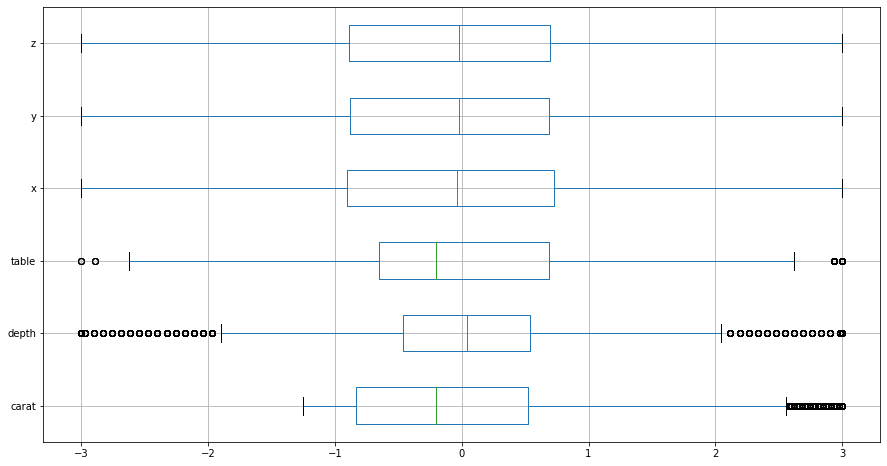

In [32]:
plt.figure(figsize=(15,8))
df.iloc[:, [0,4,5,6,7,8]].boxplot(vert=0)

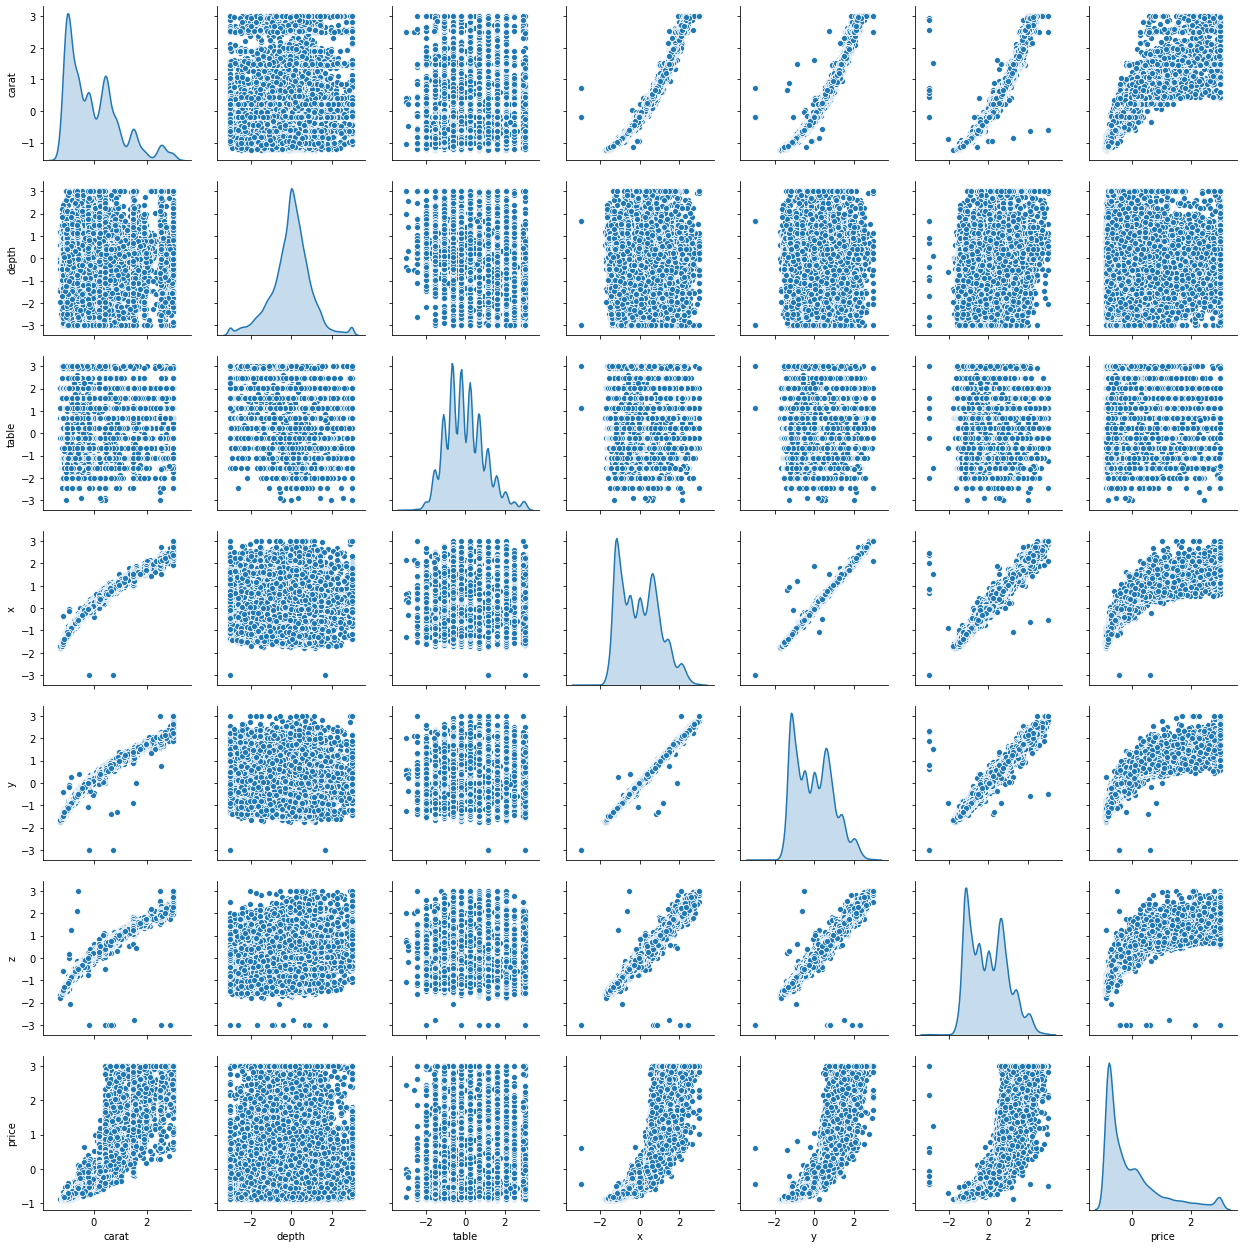

In [33]:
df_attr = (df.iloc[:, [0,4,5,6,7,8,9]])
sns.pairplot(df_attr, diag_kind='kde') 

In [34]:
t=df.iloc[:,0:9]

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(t.values, ix) for ix in range(t.shape[1])] 

In [36]:
i=0
for column in t.columns:
    if i < 9:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 27.917344232448244
cut ---> 4.382838970461722
color ---> 3.110080527269252
clarity ---> 4.2953916873296
depth ---> 2.9035757844103416
table ---> 1.182422735448638
x ---> 381.726982918867
y ---> 373.0210762369893
z ---> 121.16315622771121


In [37]:
x = df.iloc[:,0:6] 
y = df[['price']]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [39]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 0.9923904915254124
The coefficient for cut is 0.015160458980903511
The coefficient for color is -0.06414378377040784
The coefficient for clarity is 0.07407475213628137
The coefficient for depth is -0.03383286454426089
The coefficient for table is -0.054912391460408765


In [41]:
mse = np.mean((regression_model.predict(x_test)-y_test)**2)

In [42]:
import math
math.sqrt(mse)

0.32168006344000927

In [43]:
regression_model.score(x_test, y_test)

0.890896718233625

In [44]:
expr= 'price ~ carat + cut + color + clarity + depth + table '

In [45]:
data_train = pd.concat([x_train, y_train], axis=1)

In [46]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -0.155992
carat        0.992390
cut          0.015160
color       -0.064144
clarity      0.074075
depth       -0.033833
table       -0.054912
dtype: float64

In [47]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 2.649e+04
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:10:26   Log-Likelihood:                -5168.3
No. Observations:               18876   AIC:                         1.035e+04
Df Residuals:                   18869   BIC:                         1.041e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1560      0.009    -17.550      0.0

Question 2

In [48]:
df=pd.read_csv('Holiday_Package.csv')

In [49]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [50]:
df=df.iloc[:,1:]

In [51]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [52]:
df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


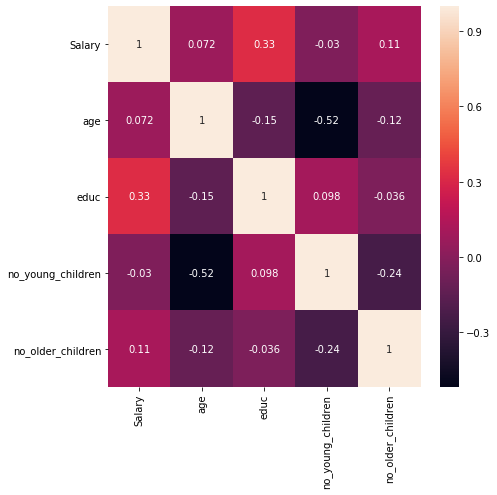

In [53]:
plt.figure(figsize=(7,7))
sns.heatmap(df.iloc[:,1:6].corr(),annot=True)

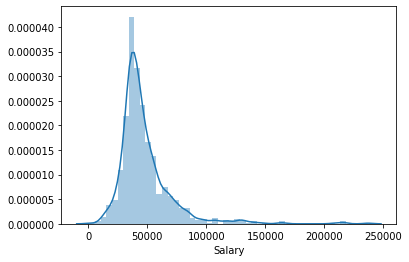

In [54]:
sns.distplot(df['Salary'])

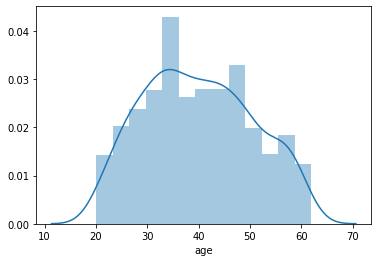

In [55]:
sns.distplot(df['age'])

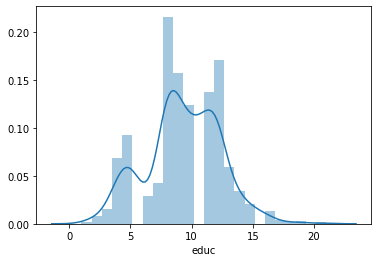

In [56]:
sns.distplot(df['educ'])

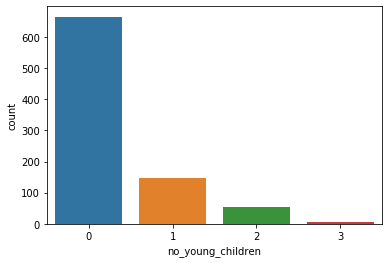

In [57]:
sns.countplot(df['no_young_children'])

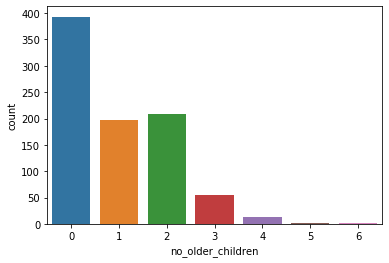

In [58]:
sns.countplot(df['no_older_children'])

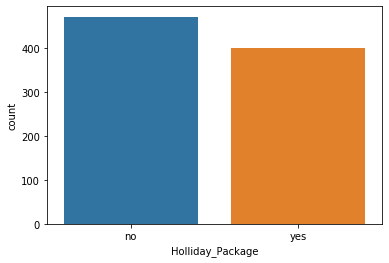

In [59]:
sns.countplot(df['Holliday_Package'])

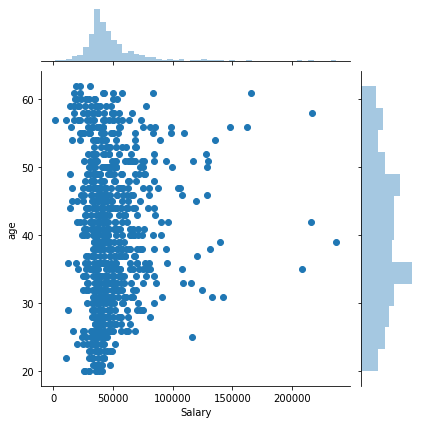

In [60]:
sns.jointplot(df['Salary'],df['age'])

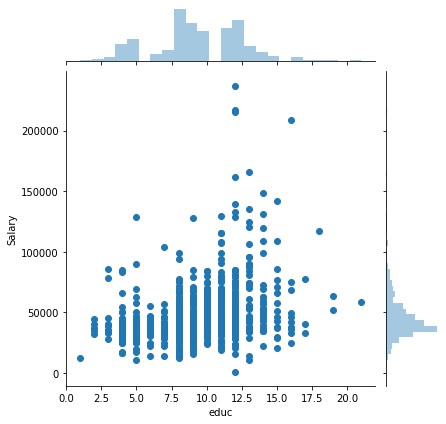

In [61]:
sns.jointplot(df['educ'],df['Salary'])

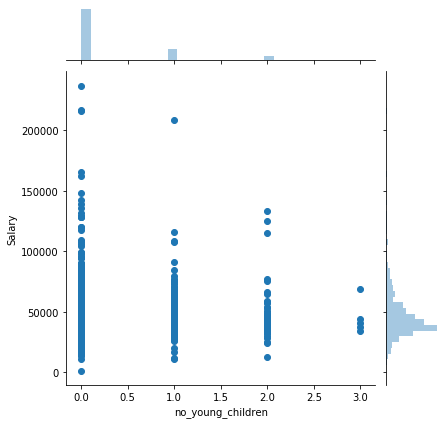

In [62]:
sns.jointplot(df['no_young_children'],df['Salary'])

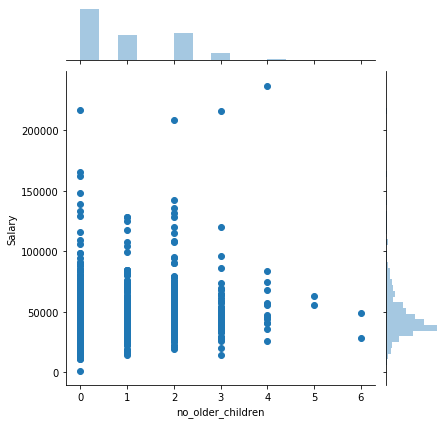

In [63]:
sns.jointplot(df['no_older_children'],df['Salary'])

In [64]:
print(df['no_young_children'].unique())
print(df['no_young_children'].value_counts().sort_values())

[1 0 2 3]
3      5
2     55
1    147
0    665
Name: no_young_children, dtype: int64


In [65]:
df['no_young_children']=np.where(df['no_young_children']>2,2,df['no_young_children'])

In [66]:
print(df['no_older_children'].unique())
print(df['no_older_children'].value_counts().sort_values())

[1 0 2 4 3 5 6]
6      2
5      2
4     14
3     55
1    198
2    208
0    393
Name: no_older_children, dtype: int64


In [67]:
df['no_older_children']=np.where(df['no_older_children']>3,3,df['no_older_children'])

In [68]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [69]:
df.duplicated().sum()

0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


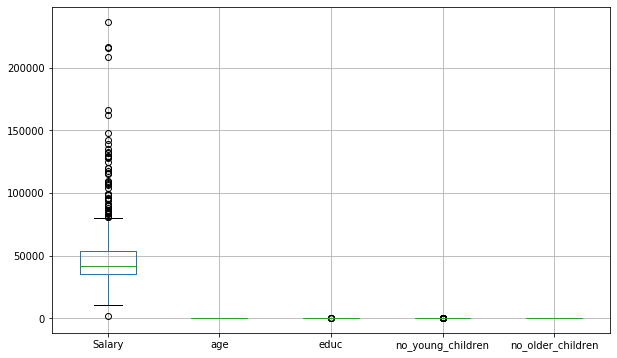

In [71]:
plt.figure(figsize=(10,6))
df.iloc[:,1:6].boxplot()

In [72]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [73]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

In [74]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [75]:
df1=df

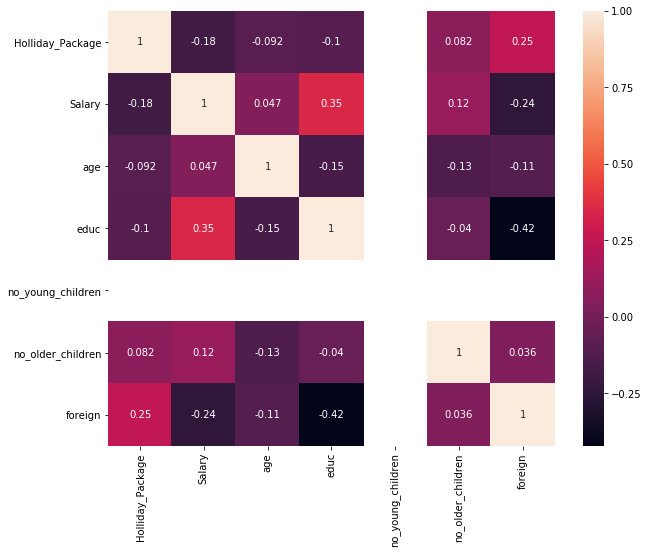

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [77]:
x=df.drop('Holliday_Package',axis=1)
y=df['Holliday_Package']

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\dharu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [81]:
ytest_predict_prob=model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.618658,0.381342
1,0.533442,0.466558
2,0.555943,0.444057
3,0.627781,0.372219
4,0.497051,0.502949


In [82]:
model.score(x_train, y_train)

0.5262295081967213

In [83]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

AUC: 0.581


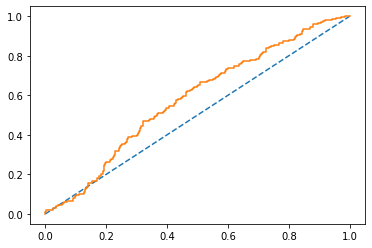

In [84]:
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.581


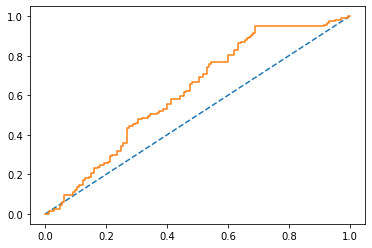

In [85]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [86]:
confusion_matrix(y_train, ytrain_predict)

array([[303,  23],
       [266,  18]], dtype=int64)

In [87]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.53      0.93      0.68       326
           1       0.44      0.06      0.11       284

    accuracy                           0.53       610
   macro avg       0.49      0.50      0.39       610
weighted avg       0.49      0.53      0.41       610



In [88]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[135,  10],
       [106,  11]], dtype=int64)

In [89]:
test_acc=model.score(x_test,y_test)
test_acc

0.5572519083969466

In [90]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.56      0.93      0.70       145
           1       0.52      0.09      0.16       117

    accuracy                           0.56       262
   macro avg       0.54      0.51      0.43       262
weighted avg       0.54      0.56      0.46       262



In [91]:
x=df1.drop('Holliday_Package',axis=1)
y=df1['Holliday_Package']

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)

C:\Users\dharu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [94]:
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [95]:
model.score(x_train, y_train)

0.6409836065573771

AUC: 0.666


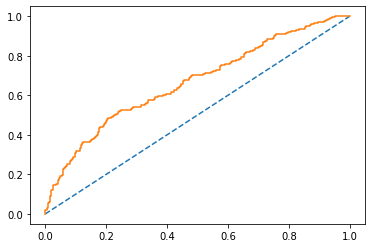

In [96]:
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.666


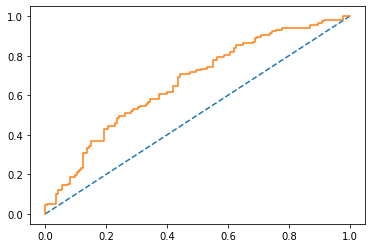

In [97]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [98]:
confusion_matrix(y_train, ytrain_predict)

array([[268,  58],
       [161, 123]], dtype=int64)

In [99]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.82      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



In [100]:
model.score(x_test,y_test)

0.6297709923664122

In [101]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



In [102]:
confusion_matrix(y_test, ytest_predict)

array([[113,  32],
       [ 65,  52]], dtype=int64)